# Truth Tables Using Logistic Regression

In [1]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt

### Create AND Truth Tables in an array

In [2]:
X = (np.array([[0, 0], [0, 1], [1, 0], [1, 1]]))
y = (np.array([0, 0, 0, 1]))
print(X)
print(y)

[[0 0]
 [0 1]
 [1 0]
 [1 1]]
[0 0 0 1]


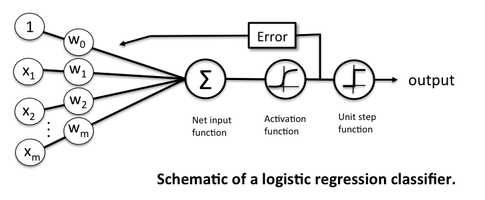

### Logistic regression hypothesis - Sigmoid Activation Function
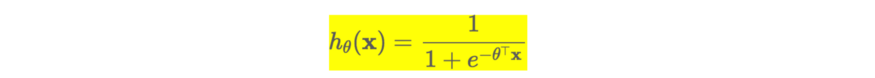

### Cost Function
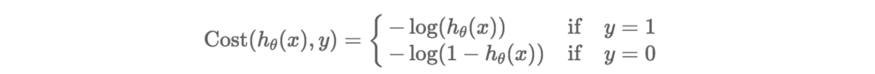

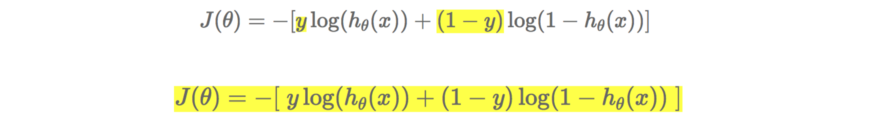

### Input Funtion -- z = w^T*x = w0*x0 + w1*x1 + .... + wmxm
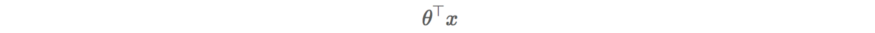

### Threshold Function --  y = 1 if theta(z) >=.5 otherwise 0  

### Sigmoid function activation function

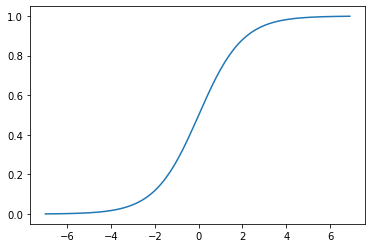

In [3]:
z = np.arange(-7, 7, 0.1)
sigmoid = 1.0 / (1.0 + np.exp(-z))
plt.plot(z, sigmoid)

### Logistic Regression Classifier

In [4]:
eta = 1 # Learning Rate
n_iter = 500 # Number of passes over training data
rgen = np.random.RandomState(1)
w = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1]) # Random weights
print(w)

[ 0.01624345 -0.00611756 -0.00528172]


In [5]:
cost_ = []

for i in range(n_iter):
    net_input = np.dot(X, w[1:]) + w[0]
    print(net_input)
    activation = 1. / (1. + np.exp(-np.clip(net_input, -250, 250))) # Logistic sigmoid activation
    errors = y - activation
    w[1:] += eta * X.T.dot(errors)
    w[0] += eta * errors.sum()
    cost = (-y.dot(np.log(activation)) - ((1 - y).dot(np.log(1 - activation)))) # Compute the logistic 'cost'
    cost_.append(cost)

[0.01624345 0.01096174 0.01012589 0.00484417]
[-0.99430022 -1.00353338 -1.00416027 -1.01339344]
[-1.06705157 -0.61084829 -0.61135215 -0.15514887]
[-1.4879227  -0.84487554 -0.8452645  -0.20221733]
[-1.72270977 -0.82978878 -0.83009599  0.062825  ]
[-1.99724782 -0.92371765 -0.9239599   0.14957027]
[-2.22241575 -0.9704096  -0.97060256  0.28140359]
[-2.43962086 -1.03230388 -1.03245839  0.3748586 ]
[-2.63769967 -1.08565284 -1.08577743  0.4662694 ]
[-2.82380327 -1.13869459 -1.13879567  0.546313  ]
[-2.99823605 -1.18896725 -1.18904976  0.62021904]
[-3.16288266 -1.23732592 -1.23739367  0.68816308]
[-3.31881926 -1.28372248 -1.28377842  0.75131837]
[-3.46704133 -1.32832769 -1.32837412  0.81033952]
[-3.60835243 -1.37125675 -1.3712955   0.86580018]
[-3.74343258 -1.41262483 -1.41265732  0.91815043]
[-3.87285858 -1.45253631 -1.45256369  0.96775859]
[-3.99712501 -1.49108678 -1.49110994  1.01492829]
[-4.11665943 -1.52836338 -1.52838308  1.05991297]
[-4.23183448 -1.56444561 -1.56446242  1.10292645]
[-4.

### Plot Cost

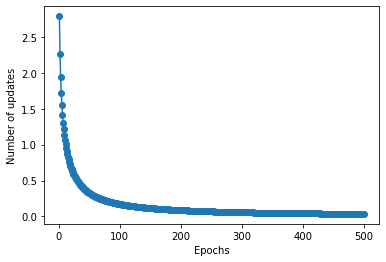

In [6]:
plt.plot(range(1, len(cost_) + 1), cost_, marker='o')

plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.show()

### Predict

In [7]:
predict = np.where(net_input >= 0.5, 1, 0)
print(predict)
print(y)

[0 0 0 1]
[0 0 0 1]


### It worked correctly

### Training a logistic regression model with scikit-learn

In [46]:
from sklearn.linear_model import LogisticRegression

In [47]:
lr = LogisticRegression(C=100.0, random_state=1, solver='lbfgs', multi_class='ovr')
lr.fit(X, y)

LogisticRegression(C=100.0, multi_class='ovr', random_state=1)

In [48]:
lr.predict(X)

array([0, 0, 0, 1])

In [49]:
lr.predict_proba(X)

array([[9.99676509e-01, 3.23491201e-04],
       [9.49268867e-01, 5.07311326e-02],
       [9.49268867e-01, 5.07311326e-02],
       [1.01770027e-01, 8.98229973e-01]])

In [50]:
lr.score(X, y)

1.0